In [5]:
%matplotlib inline 
from interval import interval
import matplotlib.pyplot as plt
from sympy import(
    init_printing,
    var,
    exp,
    cos,
    sin,
    log,
    expand_log
)
from sympy.utilities.lambdify import lambdify 
from sympy.plotting import plot
init_printing()


from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk
from symbol_derivative import(
    get_f_df_ddf_from_symbol_representation,
    get_global_minima_from_f_expr,
    calc_f_expr_meshgrid,
    plot3D,
    visualize_optimization_log,
)

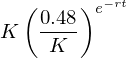

In [10]:
K, r, t = var("K, r, t")
z = var("z")
y_0 = var("y_0")

y_expr= K * (y_0 / K)**exp(-r * t)
y_expr= y_expr.subs(y_0, 0.48)
display(y_expr)

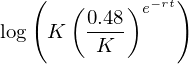

In [13]:
display(log(y_expr))
expand_log(log(y_expr), force=True)

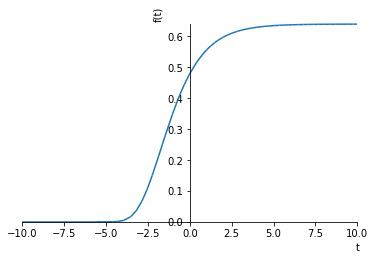

[(-5, 1.7125481876094121e-05), (-3, 0.052822504645566329), (-1, 0.35440650467157225), (1, 0.5563726361081619)]


In [3]:
true_y_expr = y_expr.subs([(K, 0.64), (y_0, 0.48), (r, 0.72)])
display(true_y_expr)
plot(true_y_expr)
true_y = lambdify(t, true_y_expr)
sample_data = [(time, true_y(time)) for time in range(-5,3, 2)]
print(sample_data)

In [18]:
loss_expr = 0
for time, value in sample_data:
    print(time)
    pred_value =  log(y_expr.subs(t, time))
    pred_value = expand_log(pred_value, force=True)
    loss_expr += (log(value) - pred_value) ** 2
f_expr = loss_expr

-5
-3
-1
1


In [20]:
f, df, ddf = get_f_df_ddf_from_symbol_representation(f_expr, (K, r))

In [56]:
X = ip([[interval[0.5, 1.5]],[interval[0.3, 1.5]]])
f(X)

In [57]:
kra = Krawczyk(df, ddf, X)

In [60]:
kra.find_all_solution?

In [63]:
visualize_optimization_log(kra, f, animation_box, skip=50)

Start saveing images in image/20171223_160928 dirctory.
Finish saveing images in image/20171223_160928 dirctory.


In [1]:
f(ip([[interval[0.3, 0.3002]],[interval[0.5, 0.5008]]]))

NameError: name 'f' is not defined